In [43]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('fraudTest.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
try:
    train_df = pd.read_csv('fraudTest.csv')
    test_df = pd.read_csv('fraudTest.csv')
except:
    train_df = pd.read_csv('fraudTest.csv')
    test_df = pd.read_csv('fraudTest.csv')
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
train_df.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

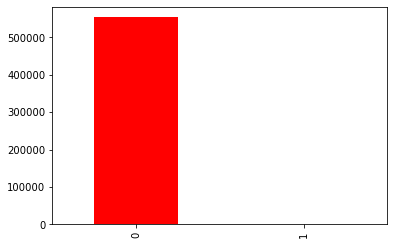

In [33]:
 train_df ["is_fraud"].value_counts().plot(kind="bar",color=["red","blue"]);

In [35]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [37]:
train_df.gender.value_counts()

F    304886
M    250833
Name: gender, dtype: int64

In [39]:
pd.crosstab(train_df.is_fraud,train_df.gender) 

gender,F,M
is_fraud,,
0,303722,249852
1,1164,981


In [40]:
303722/249852

1.2156076397227158

In [41]:
1164/981

1.1865443425076452

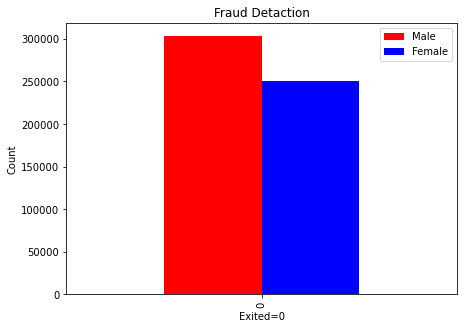

In [44]:

exited_0_gender = pd.crosstab(train_df[train_df['is_fraud'] == 0].is_fraud, train_df[train_df['is_fraud'] == 0].gender)
exited_0_gender.plot(kind="bar", figsize=(7, 5), color=["red", "blue"])
plt.title("Fraud Detaction")
plt.xlabel("Exited=0")
plt.ylabel("Count")
plt.legend(('Male', 'Female'))
plt.show()

<AxesSubplot:ylabel='Frequency'>

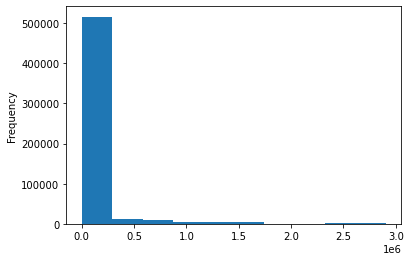

In [50]:
train_df.city_pop.plot.hist()

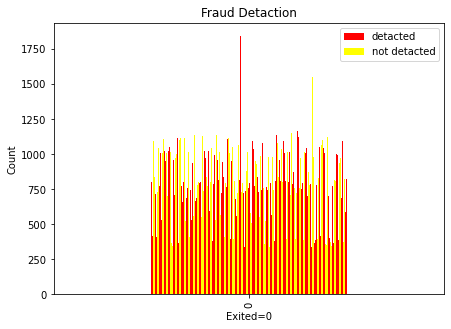

In [59]:
exited_0_gender1 = pd.crosstab(train_df[train_df['is_fraud'] == 0].is_fraud, train_df[train_df['is_fraud'] == 0].merchant)
exited_0_gender1.plot(kind="bar", figsize=(7, 5), color=["red", "yellow"])
plt.title("Fraud Detaction")
plt.xlabel("Exited=0")
plt.ylabel("Count")
plt.legend(('detacted', 'not detacted'))
plt.show()

In [15]:
def data_pre(X):
    del_col=['merchant','first','last','street','zip','unix_time','Unnamed: 0','trans_num','cc_num']
    X.drop(columns=del_col,inplace=True)
   
    
    X['trans_date_trans_time']=pd.to_datetime(X['trans_date_trans_time'])
    X['trans_date']=X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    X['trans_date']=pd.to_datetime(X['trans_date'])
    
    
    X['dob']=pd.to_datetime(X['dob'])
    
    #Calculate Age of each trans 
    X["age"] = (X["trans_date"] - X["dob"]).dt.days //365

    
    X['trans_month']=X['trans_date'].dt.month
    X['trans_year']=X['trans_date'].dt.year
    
    X['gender']=X['gender'].apply(lambda x : 1 if x=='M' else 0)
    X['gender']=X['gender'].astype(int)
    X['lat_dis']=abs(X['lat']-X['merch_lat'])
    X['long_dis']=abs(X['long']-X['merch_long'])
    X=pd.get_dummies(X,columns=['category'])
    X=X.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])
    return X
    

In [16]:
train_df_pre=data_pre(train_df.copy())

In [17]:
train_df_pre.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52,6,2020,0.020491,0.265214,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30,6,2020,0.870202,0.475569,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49,6,2020,0.177090,0.659611,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32,6,2020,0.242698,0.063961,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,65,6,2020,0.706248,0.867734,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
x_train=train_df_pre.drop('is_fraud',axis=1)
y_train=train_df_pre['is_fraud']

In [20]:
test_df_pre=data_pre(test_df.copy())
test_df_pre.head()
x_test=test_df_pre.drop('is_fraud',axis=1)
y_test=test_df_pre['is_fraud']


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred_logistic = logistic_regression.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic

0.9958504208061988

In [29]:
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(x_train,y_train)
y_pred_dt = DecisionTree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

1.0

In [28]:
random_forest = RandomForestClassifier(random_state=42,n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9999964010588085

In [30]:
# Print classification report for each model
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      1.00      1.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      1.00      1.00    555719
weighted avg       1.00      1.00      1.00    555719


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      1.00      1.00      2145

    accuracy                           1.00    